# LIQUID DAMPERS

Ludovic MATAR 21216648

Lucas PELLEQUER 28601042

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.display import Video

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

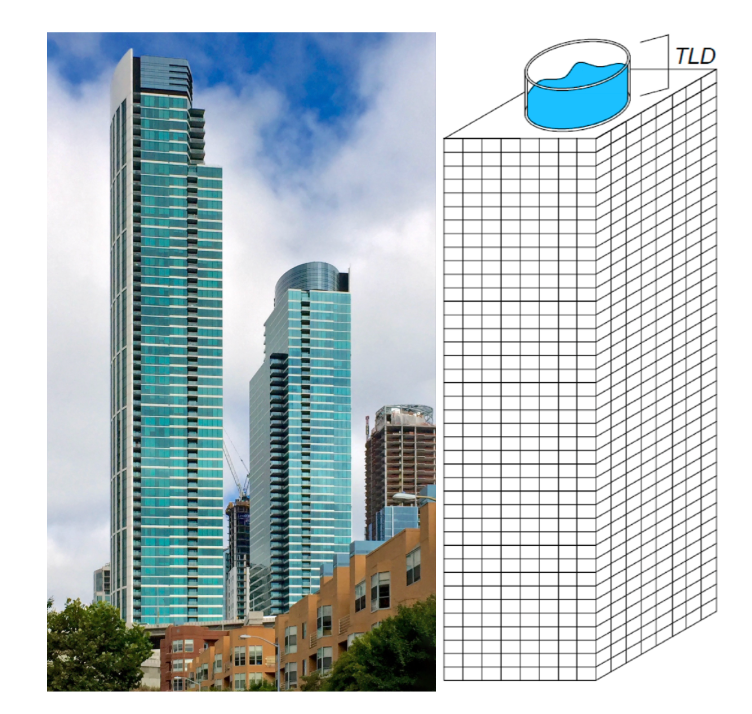

In [63]:
Image(filename='./figs/liquidd.png',width=500)

# Code Tracker

In [12]:
import cv2
import time
import matplotlib.pyplot as plt

# Load the video file
cap = cv2.VideoCapture('/Users/lucas/FAC jupy/Meca Experimentale/160ml 1.9hz.mov')

# Initialize the tracker
tracker = cv2.TrackerCSRT_create()

# Read the first frame
success, frame = cap.read()

# Select the object to track
bbox = cv2.selectROI(frame, False)

# Initialize the tracker with the first frame and the selected object
tracker.init(frame, bbox)

# Set up a timer
start_time = time.time()
X = []
Y = []


# Loop through each frame in the video
while True:
    # Read the next frame
    success, frame = cap.read()
    if not success:
        break

    # Update the tracker with the new frame
    success, bbox = tracker.update(frame)

    # If the tracking was successful, draw a bounding box around the object
    if success:
        x, y, w, h = [int(v) for v in bbox]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Display the frame with the bounding box
    cv2.imshow("Tracking", frame)

    # Calculate the elapsed time
    elapsed_time = time.time() - start_time

    # Print the coordinates and elapsed time
    X.append(x)
    Y.append(y)
    #print(f"({x}, {y}) at {elapsed_time:.2f} seconds")

    # Press 'q' to quit the loop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Close the tracking window
cap.release()
cv2.destroyWindow("Tracking")






# Enregistrement fichier txt

In [6]:
import pandas as pd

In [39]:
''''
dictt = {}
dictt['X_0'] = X_0
dictt['X_40'] = X_40
dictt['X_80'] = X_80
dictt['X_120'] = X_120
dictt['X_160'] = X_160
dictt['X_40g'] = X_40g
dictt['X_80g'] = X_80g
dictt['X_120g'] = X_120g
dictt['X_160g'] = X_160g
''''

In [ ]:
f = open("dictt.txt", "a")
f.write( str(dictt2) )
# close file
f.close()

In [7]:
ls

Meca EXP-Copy1.ipynb  meca 120g.mov         meca 40mL.mov
Meca EXP.ipynb        meca 120mL.mov        meca 80g.mov
dictt copy.txt        meca 160g.mov         meca 80mL.mov
dictt.txt             meca 160mL.mov
meca 0mL.mov          meca 40g.mov


In [ ]:
''''
# open file for writing
f = open("dictt.txt","r")

# write file
f.write( str(dictt) )

# close file
f.close()
''''

In [ ]:
f = open("dictt.txt", encoding = 'utf-8').read()
for a in f.split(' '):
    print(a)

# Cellules a executer pour récupérer les valeurs

In [3]:
path = 'dictt.txt'

In [4]:
import re
'''
def extract_dict(path):
    dictt = {}
    book = open(path, encoding = 'utf-8').read()
    regex = re.compile("[^A-Za-z0-9 ]")
    split = book.replace(',', ' ')
    split = split.replace(':', ' ')
    split = split.replace('[', ' ')
    split = split.replace('{', ' ')
    split = split.replace('}', ' ')
    #split = split.replace('}{', ' ')
    #split = split.replace('')
    C = regex.sub('', book).split()
    #print(C)
    dictt = {'X0':[], 'X40': [], 'X80':[], 'X120':[], 'X160':[], 'X40g': [], 'X80g':[], 'X120g':[], 'X160g':[], 'X200':[], 'X200g':[], 'X300':[], 'X300g':[]}
    key = 0
    for ch in C:
        if ch in ['X0', 'X40', 'X80', 'X120', 'X160', 'X40g', 'X80g', 'X120g', 'X160g', 'X200', '417X200','X200g', 'X300', 'X300g']:
            if ch!= '417X200':
                key = ch
            else:
                key = 'X200'
        else:
            dictt[key].append(float(ch))
    return dictt
'''

'\ndef extract_dict(path):\n    dictt = {}\n    book = open(path, encoding = \'utf-8\').read()\n    regex = re.compile("[^A-Za-z0-9 ]")\n    split = book.replace(\',\', \' \')\n    split = split.replace(\':\', \' \')\n    split = split.replace(\'[\', \' \')\n    split = split.replace(\'{\', \' \')\n    split = split.replace(\'}\', \' \')\n    #split = split.replace(\'}{\', \' \')\n    #split = split.replace(\'\')\n    C = regex.sub(\'\', book).split()\n    #print(C)\n    dictt = {\'X0\':[], \'X40\': [], \'X80\':[], \'X120\':[], \'X160\':[], \'X40g\': [], \'X80g\':[], \'X120g\':[], \'X160g\':[], \'X200\':[], \'X200g\':[], \'X300\':[], \'X300g\':[]}\n    key = 0\n    for ch in C:\n        if ch in [\'X0\', \'X40\', \'X80\', \'X120\', \'X160\', \'X40g\', \'X80g\', \'X120g\', \'X160g\', \'X200\', \'417X200\',\'X200g\', \'X300\', \'X300g\']:\n            if ch!= \'417X200\':\n                key = ch\n            else:\n                key = \'X200\'\n        else:\n            dictt[key].a

In [5]:
import re
def extract_dict2(path, keys):
    dictt = {}
    book = open(path, encoding = 'utf-8').read()
    regex = re.compile("[^A-Za-z0-9 ]")
    split = book.replace(',', ' ')
    split = split.replace(':', ' ')
    split = split.replace('[', ' ')
    split = split.replace('{', ' ')
    split = split.replace('}', ' ')
    C = regex.sub('', book).split()
    for k in keys:
        dictt[k] = []
    key = 0
    for ch in C:
        if ch in keys:
            print(ch)
            if ch!= '417X200':
                key = ch
            else:
                print('nah')
                key = 'X200'
        else:
            dictt[key].append(float(ch))
    return dictt

In [6]:
keys3 = ['X0', 'X40', 'X80', 'X120', 'X160', 'X40g', 'X80g', 'X120g', 'X160g', 'X200', '417X200','X200g', 'X300', 'X300g', 'X160g27','X160ml27', 'X160ml19','X160g19']
dictt3 = extract_dict2('dict_3.txt', keys3)

X160g27
X160ml27
X160ml19
X160g19
X0
X40
X80
X120
X160
X40g
X80g
X120g
X160g
X200
X200g
X300
X300g


In [7]:
dictt3.keys()
X_0 = dictt3['X0']
X_40 = dictt3['X40']
X_80 = dictt3['X80']
X_120 = dictt3['X120']
X_160 = dictt3['X160']
X_200 = dictt3['X200']
X_300 = dictt3['X300']
X_40g = dictt3['X40g']
X_80g = dictt3['X80g']
X_120g = dictt3['X120g']
X_160g = dictt3['X160g']
X_200g = dictt3['X200g']
X_300g = dictt3['X300g']
X_160g27 = dictt3['X160g27']
X_160g19 = dictt3['X160g19']
X_160ml27 = dictt3['X160ml27']
X_160ml19 = dictt3['X160ml19']


### Fin des cellules a executer
# --------------------------------------------

## Expérience

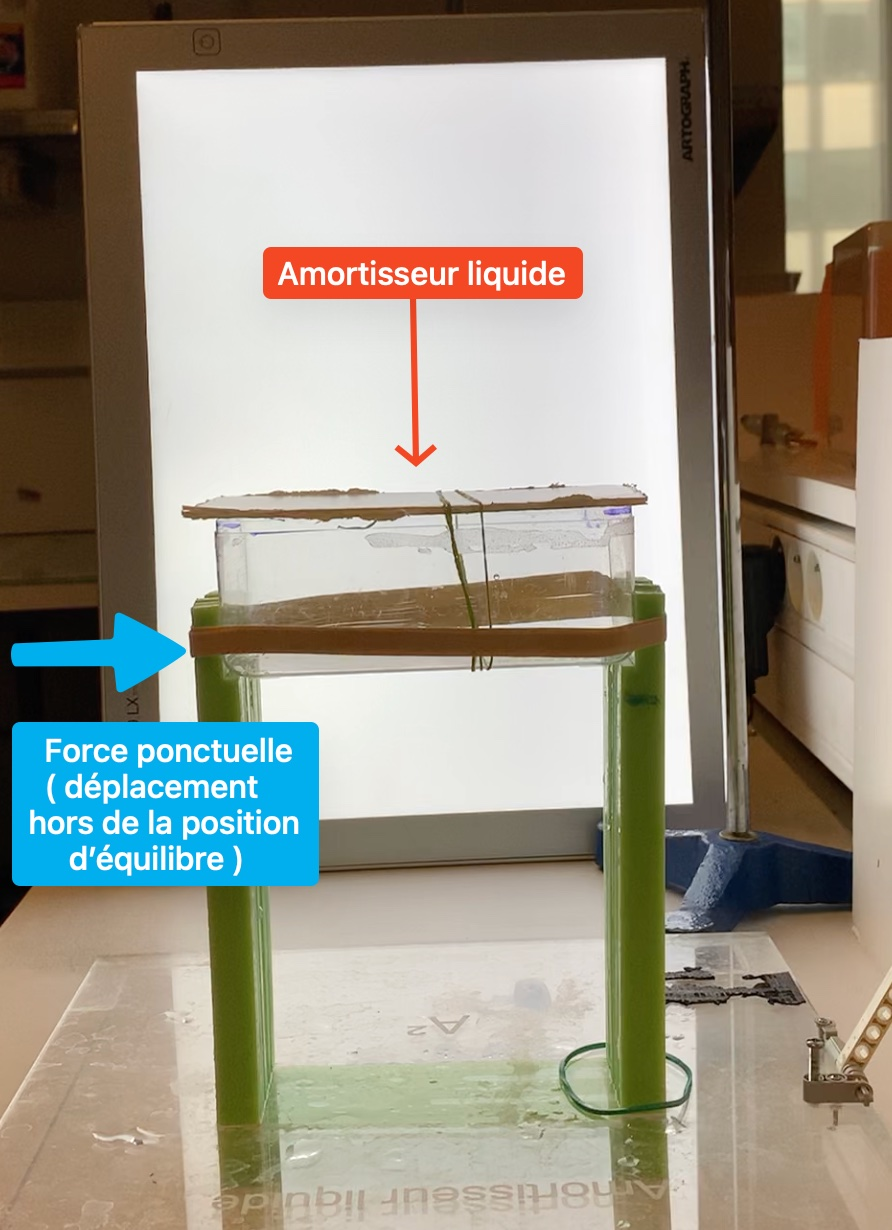

In [47]:
Image(filename='./figs/Experience1.jpeg',width=600)

### Ce qu'on essaye d'éviter

In [76]:
Video(filename='./figs/splash.mov',width=400)

### Observations sur la surface de l'eau

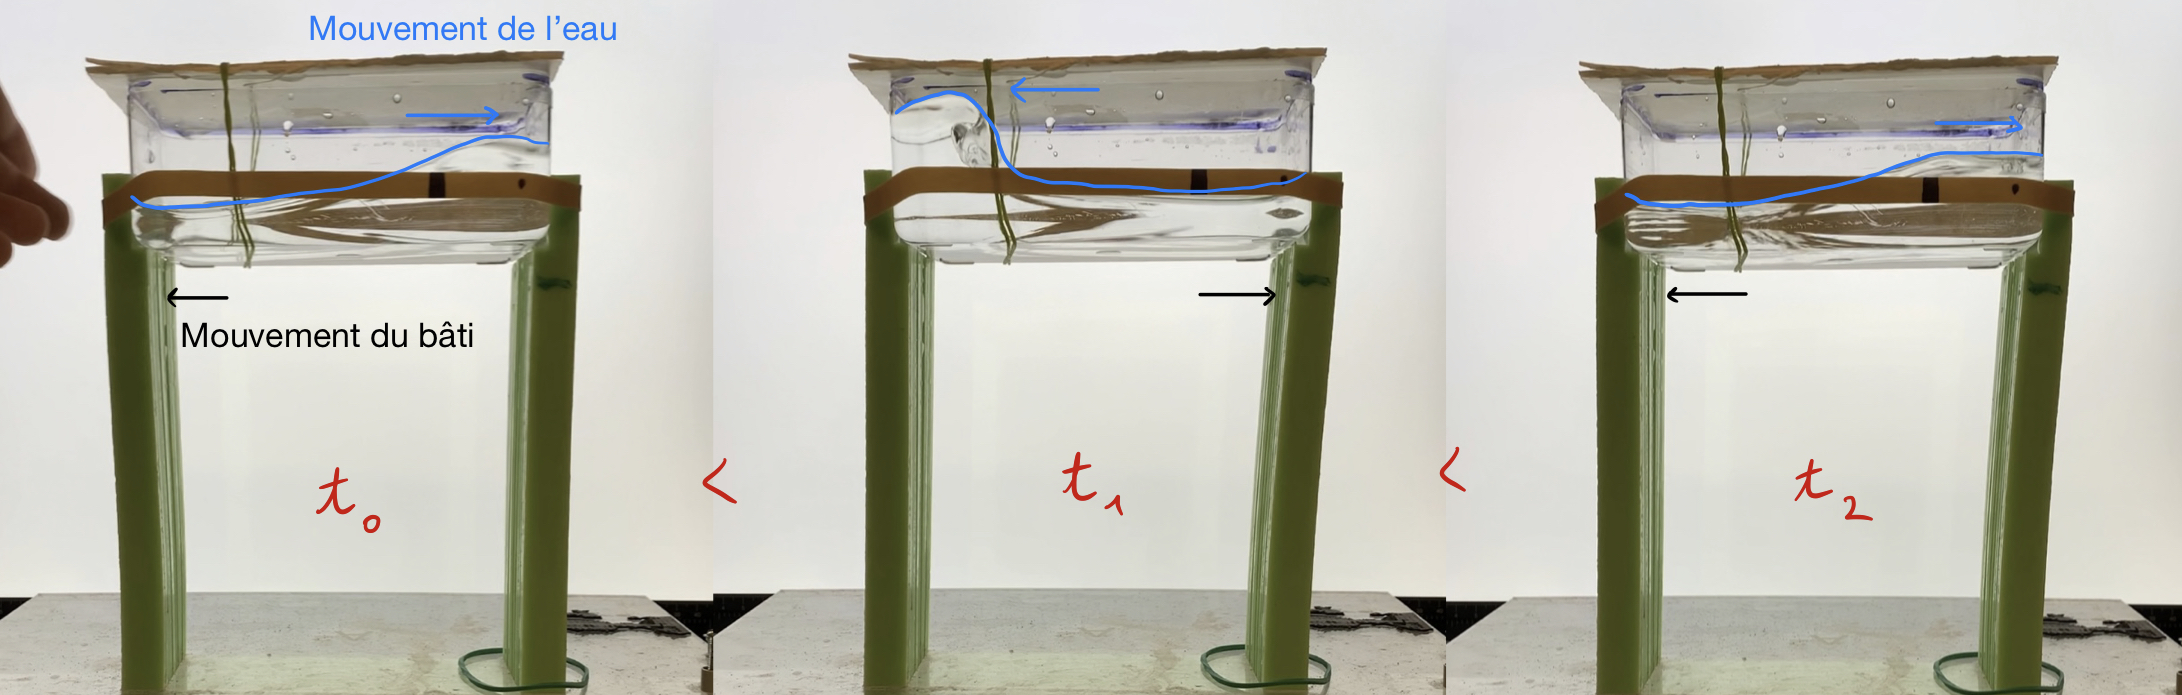

In [156]:
Image(filename='./figs/evolution.jpeg')

# Amortissement en oscillations libres

## Without TLD

utilisation de sable comme masse morte.

In [77]:
Video(filename='./figs/sable.mov',width=400)

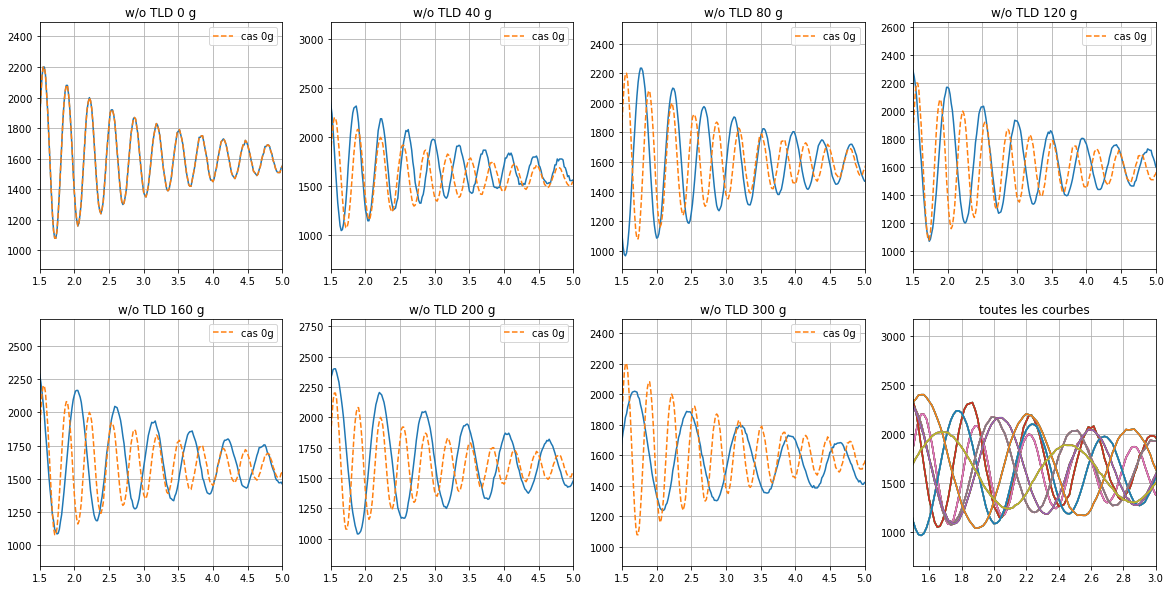

In [45]:
X_40gb=X_40g-np.ones(len(X_40g))*2500
X_80gb=(X_80g-np.ones(len(X_80g))*1100)*.5
X_120gb=(X_120g-np.ones(len(X_120g))*800)*.5
X_160gb=(X_160g-np.ones(len(X_160g))*1000)*.5
X_200gb=(X_200g-np.ones(len(X_200g))*1700)*.5
X_300gb=(X_300g+np.ones(len(X_300g))*20)*.3

fig, ax = plt.subplots(2, 4, figsize=(20,10))  
xs=[X_0,X_40gb,X_80gb,X_120gb,X_160gb,X_200gb,X_300gb]

for i in range (len(xs)):
    plt.subplot(2,4,i+1)
    plt.plot(np.arange(0,len(xs[i]))/60, xs[i])
    plt.plot(np.arange(0,len(xs[0]))/60, xs[0], '--', label='cas 0g')
    plt.xlim(1.5,5)
    #plt.ylim(100,220)
    plt.legend()
    plt.grid()
    for j in range (len(xs)):
        plt.subplot(2,4,8)
        plt.plot(np.arange(0,len(xs[i]))/60, xs[i])
        plt.xlim(1.5,3)
        #plt.ylim(100,220)
        plt.grid()
        
ax[0, 0].set_title('w/o TLD 0 g')
ax[0, 1].set_title('w/o TLD 40 g')
ax[0, 2].set_title('w/o TLD 80 g')
ax[0, 3].set_title('w/o TLD 120 g')
ax[1, 0].set_title('w/o TLD 160 g')
ax[1, 1].set_title('w/o TLD 200 g')
ax[1, 2].set_title('w/o TLD 300 g')
ax[1, 3].set_title('toutes les courbes')
plt.show()

## With TLD

In [78]:
Video(filename='./figs/eau.mov',width=400)

Text(0.5, 1.0, 'toutes les courbes')

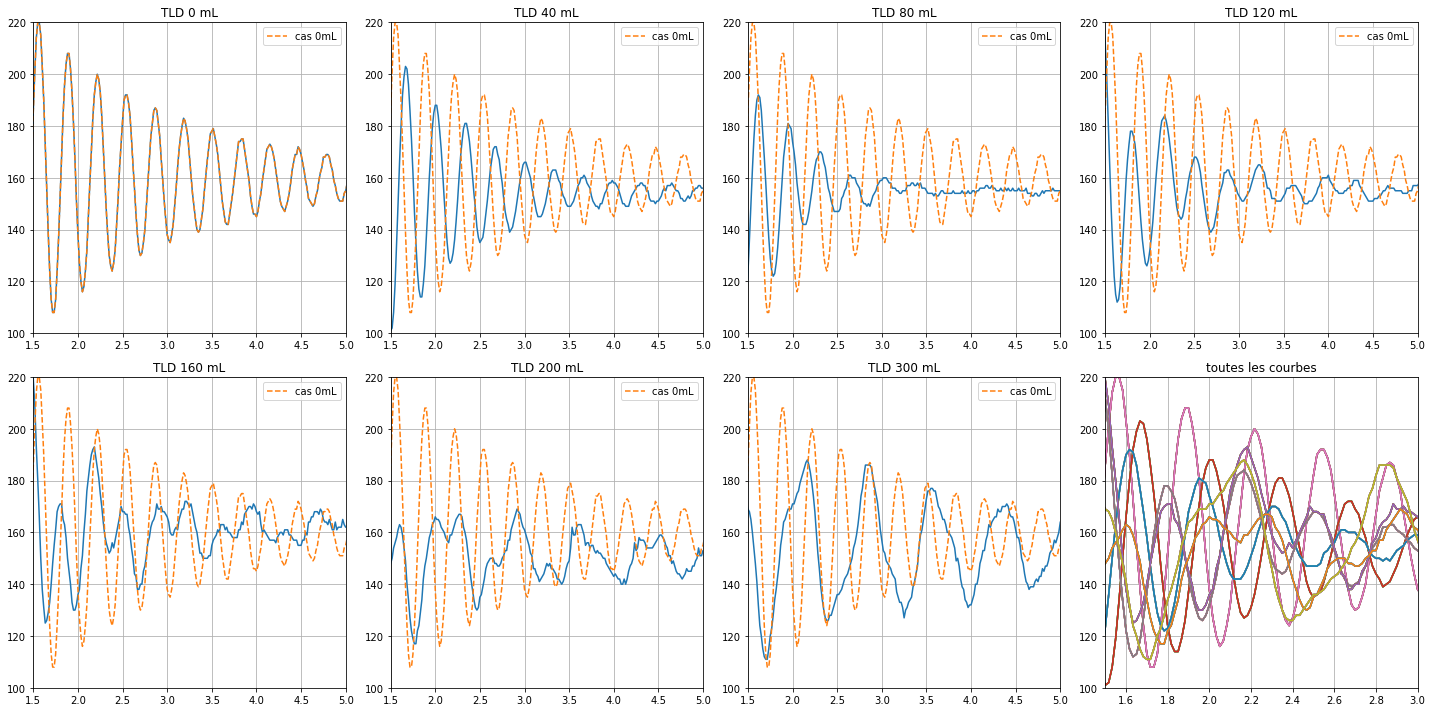

In [246]:
X_200b=X_200-np.ones(len(X_200))*500
X_300b=X_300-np.ones(len(X_300))*500
fig, ax = plt.subplots(2, 4, figsize=(20,10))  
xl=[X_0,X_40,X_80,X_120,X_160,X_200b,X_300b]

for i in range (len(xl)):
    plt.subplot(2,4,i+1)
    plt.plot(np.arange(0,len(xl[i]))/60, xl[i])
    plt.plot(np.arange(0,len(xl[0]))/60, xl[0], '--', label='cas 0mL')
    plt.xlim(1.5,5)
    plt.ylim(100,220)
    plt.legend()
    plt.grid()
    for j in range (len(xl)):
        plt.subplot(2,4,8)
        plt.plot(np.arange(0,len(xl[i]))/60, xl[i])
        plt.xlim(1.5,3)
        plt.ylim(100,220)
        plt.grid()
        
ax[0, 0].set_title('TLD 0 mL')
ax[0, 1].set_title('TLD 40 mL')
ax[0, 2].set_title('TLD 80 mL')
ax[0, 3].set_title('TLD 120 mL')
ax[1, 0].set_title('TLD 160 mL')
ax[1, 1].set_title('TLD 200 mL')
ax[1, 2].set_title('TLD 300 mL')
ax[1, 3].set_title('toutes les courbes')

## Comparaison des oscillations

Text(0.5, 1.0, 'comparaison 300 mL')

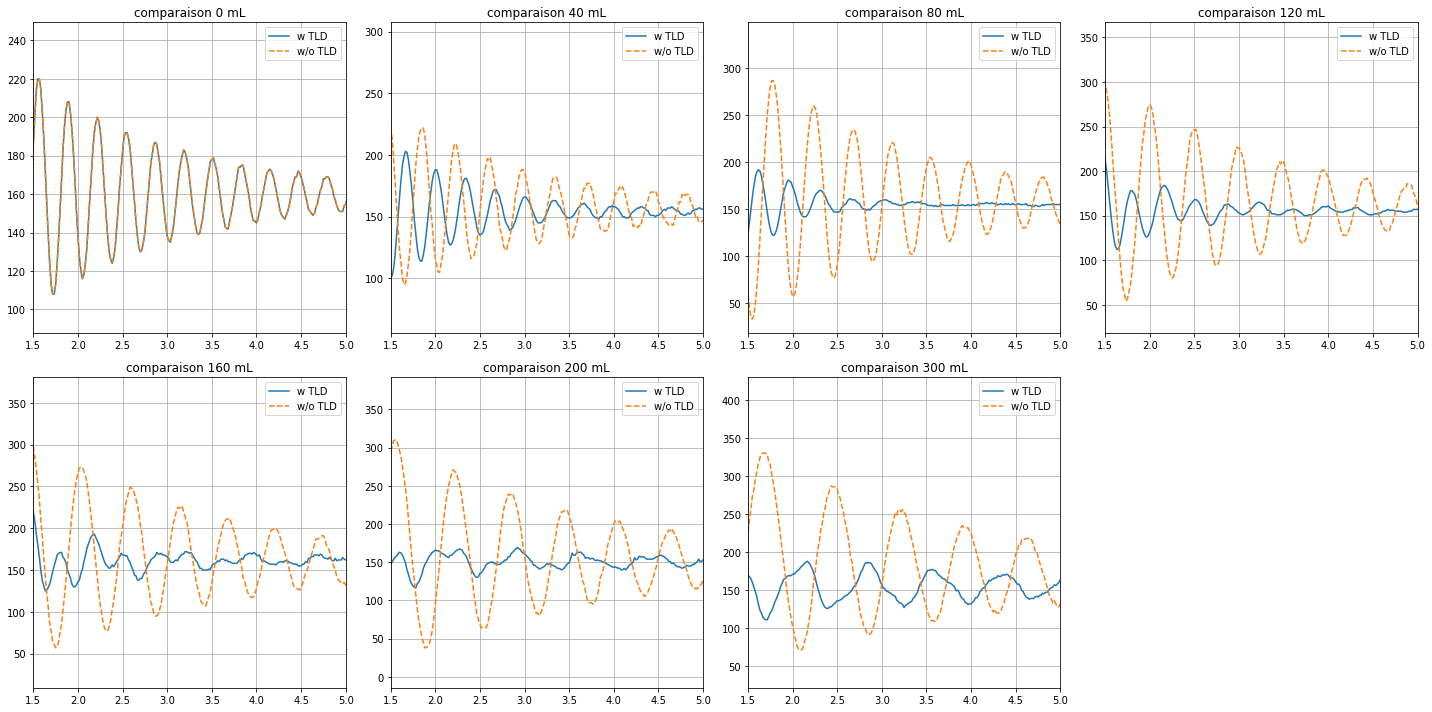

In [245]:
fig, ax = plt.subplots(2, 4, figsize=(20,10))  
for i in range (len(xl)):
    plt.subplot(2,4,i+1)
    plt.plot(np.arange(0,len(xl[i]))/60, xl[i], label='w TLD')
    plt.plot(np.arange(0,len(xs[i]))/60, xs[i], '--', label='w/o TLD')
    plt.xlim(1.5,5)
    #plt.ylim(100,220)
    plt.legend()
    plt.grid()
ax[1][3].set_visible(False)    
ax[0, 0].set_title('comparaison 0 mL')
ax[0, 1].set_title('comparaison 40 mL')
ax[0, 2].set_title('comparaison 80 mL')
ax[0, 3].set_title('comparaison 120 mL')
ax[1, 0].set_title('comparaison 160 mL')
ax[1, 1].set_title('comparaison 200 mL')
ax[1, 2].set_title('comparaison 300 mL')

# Calcul des transformées de Fourier  des différents cas

# FFT sans TLD

Text(0.5, 1.0, 'FFT 300 g')

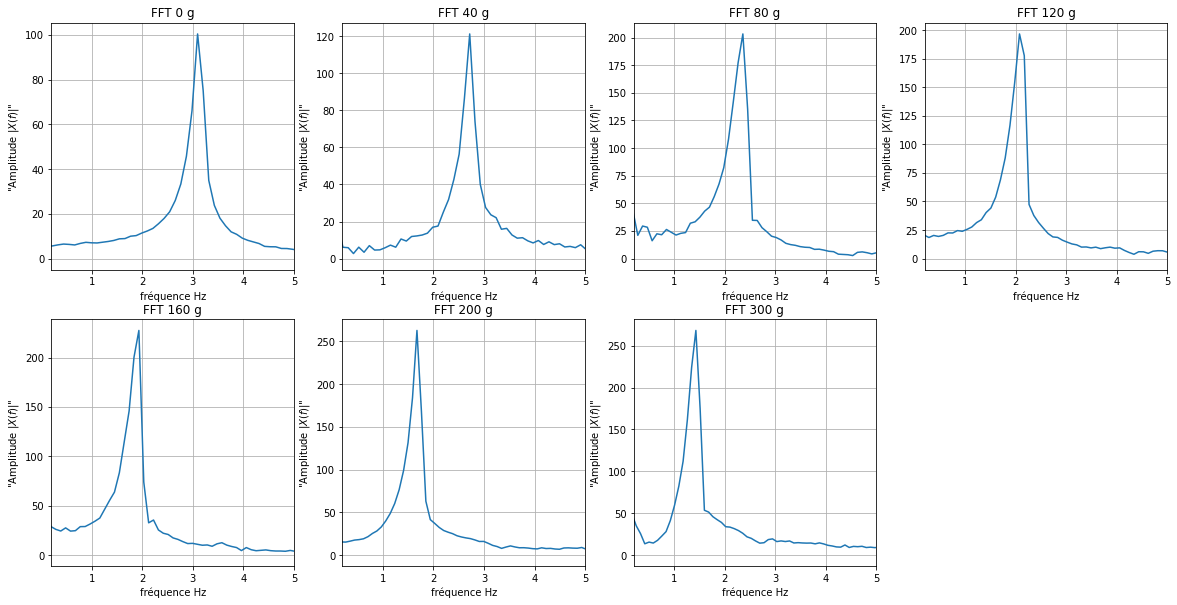

In [56]:
fig, ax = plt.subplots(2, 4, figsize=(20,10))  
x=[X_0,X_40g,X_80g,X_120g,X_160g,X_200g,X_300g]
# Calcul FFT
for i in range(len(x)):
    # Transformée de fourier
    Xi = np.fft.fft(x[i][100:]-np.mean(x[i][100:])) 
    # Fréquences de la transformée de Fourier
    freqi = np.fft.fftfreq(len(x[i][100:]), d=1/60)
    # Calcul du nombre d'échantillon
    Ni=len(x[i][100:])
    # On prend la valeur absolue de l'amplitude uniquement pour les fréquences positives et normalisation
    X_absi = np.abs(Xi[:Ni//2])*2/Ni
    # On garde uniquement les fréquences positives
    freq_posi = freqi[:Ni//2]
    
    #plot
    plt.subplot(2,4,i+1)
    plt.plot(freq_posi, X_absi, label="Amplitude absolue")
    plt.xlim(.2,5)
    plt.xlabel('fréquence Hz')
    plt.ylabel('"Amplitude $|X(f)|$"')
    plt.grid()
    
  

ax[1][3].set_visible(False)    
ax[0, 0].set_title('FFT 0 g')
ax[0, 1].set_title('FFT 40 g')
ax[0, 2].set_title('FFT 80 g')
ax[0, 3].set_title('FFT 120 g')
ax[1, 0].set_title('FFT 160 g')
ax[1, 1].set_title('FFT 200 g')
ax[1, 2].set_title('FFT 300 g')


# FFT avec TLD

Text(0.5, 1.0, 'FFT 300 mL')

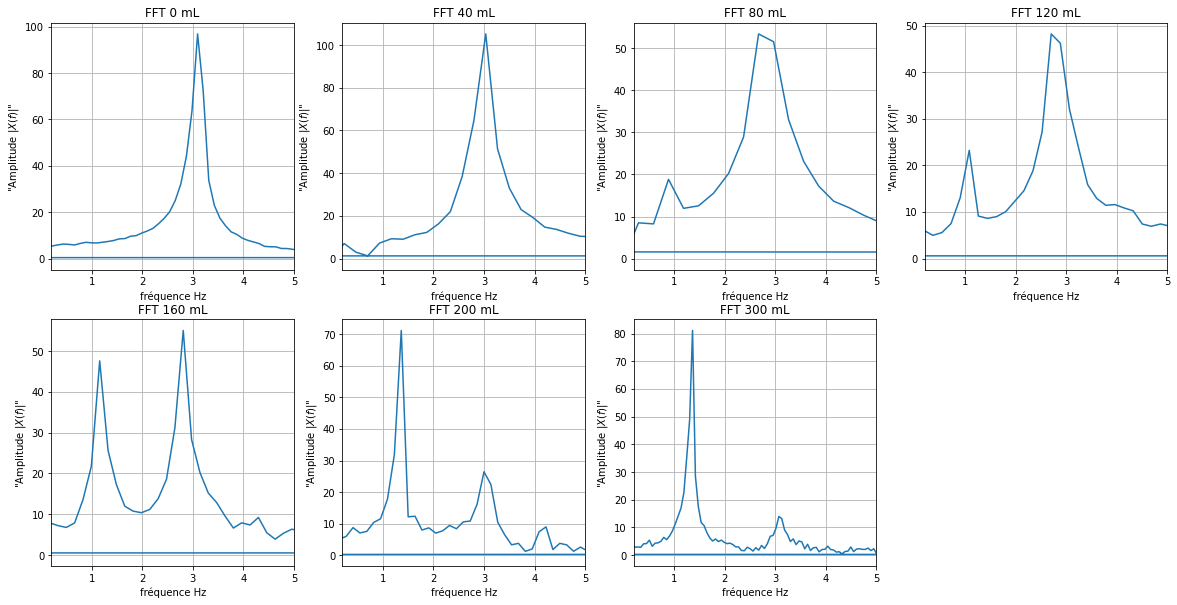

In [66]:
fig, ax = plt.subplots(2, 4, figsize=(20,10))  
x=[X_0,X_40,X_80,X_120,X_160,X_200,X_300]
# Calcul FFT
for i in range(len(x)):
    # Transformée de fourier
    Xi = np.fft.fft(x[i][100:]-np.mean(x[i][100:])) 
    # Fréquences de la transformée de Fourier
    freqi = np.fft.fftfreq(len(x[i][100:]), d=1/60)
    # Calcul du nombre d'échantillon
    Ni=len(x[i][80:])
    # On prend la valeur absolue de l'amplitude uniquement pour les fréquences positives et normalisation
    X_absi = np.abs(Xi[:Ni//2])*2/Ni
    # On garde uniquement les fréquences positives
    freq_posi = freqi[:Ni//2]
    
    #plot
    plt.subplot(2,4,i+1)
    plt.plot(freq_posi, X_absi, label="Amplitude absolue")
    plt.xlim(.2,5)
    plt.xlabel('fréquence Hz')
    plt.ylabel('"Amplitude $|X(f)|$"')
    plt.grid()
    
  

ax[1][3].set_visible(False)    
ax[0, 0].set_title('FFT 0 mL')
ax[0, 1].set_title('FFT 40 mL')
ax[0, 2].set_title('FFT 80 mL')
ax[0, 3].set_title('FFT 120 mL')
ax[1, 0].set_title('FFT 160 mL')
ax[1, 1].set_title('FFT 200 mL')
ax[1, 2].set_title('FFT 300 mL')



# COMPARAISON DES FFTs

## Analogie avec l'absorbeur dynamique accordé

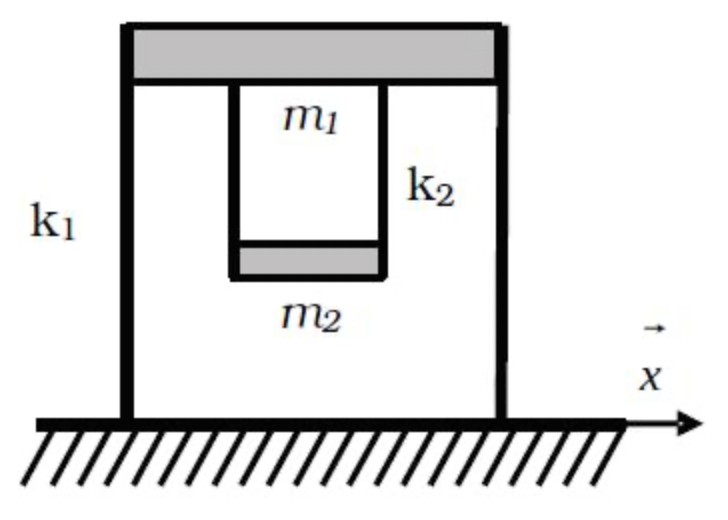

In [69]:
Image(filename='./figs/massdamp.png',width=400)

Text(0.5, 1.0, 'FFT 300 mL')

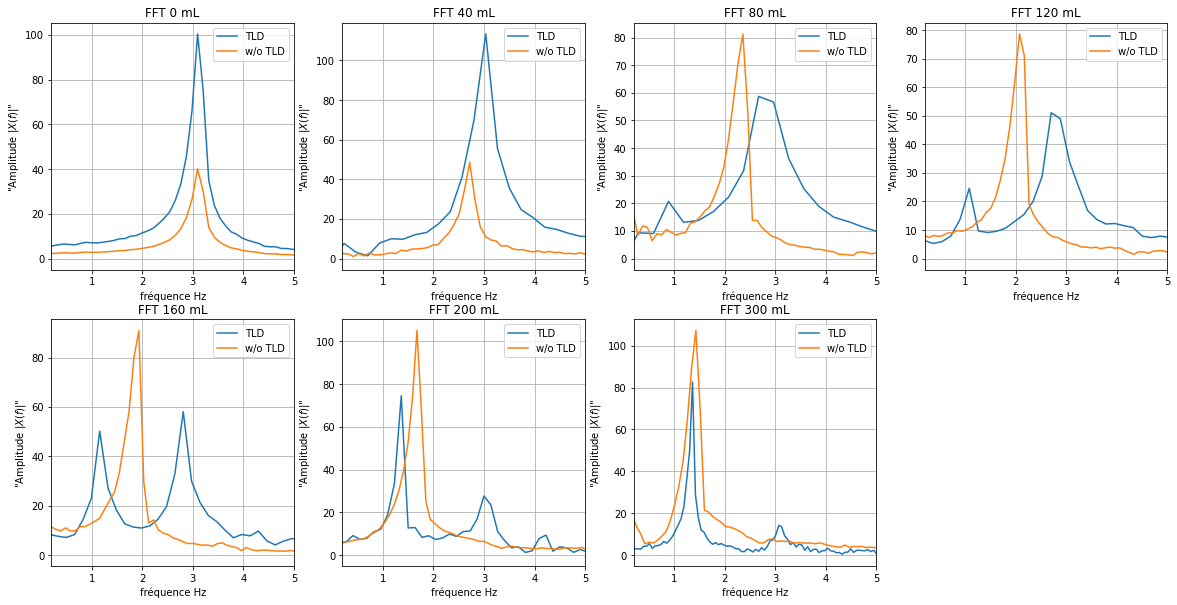

In [57]:
fig, ax = plt.subplots(2, 4, figsize=(20,10))  
x=[X_0,X_40,X_80,X_120,X_160,X_200,X_300]
y=[X_0,X_40g,X_80g,X_120g,X_160g,X_200g,X_300g]
# Calcul FFT
for i in range(len(x)):
    # Transformée de fourier
    Xi = np.fft.fft(x[i][100:]-np.mean(x[i][100:]))
    Yi = np.fft.fft(y[i][100:]-np.mean(y[i][100:]))
    # Fréquences de la transformée de Fourier
    freqi = np.fft.fftfreq(len(x[i][100:]), d=1/60)
    freq1i = np.fft.fftfreq(len(y[i][100:]), d=1/60)
    # Calcul du nombre d'échantillon
    Ni=len(x[i][100:])
    N1i=len(y[i][100:])
    # On prend la valeur absolue de l'amplitude uniquement pour les fréquences positives et normalisation
    X_absi = np.abs(Xi[:Ni//2])*2/Ni
    Y_absi = np.abs(Yi[:N1i//2])*2/N1i
    # On garde uniquement les fréquences positives
    freq_posi = freqi[:Ni//2]
    freq_pos1i = freq1i[:N1i//2]
    
    #plot
    plt.subplot(2,4,i+1)
    plt.plot(freq_posi, X_absi, label="TLD")
    plt.plot(freq_pos1i, Y_absi/2.5, label="w/o TLD")
    plt.xlim(.2,5)
    plt.xlabel('fréquence Hz')
    plt.ylabel('"Amplitude $|X(f)|$"')
    plt.legend()
    plt.grid()
    
  

ax[1][3].set_visible(False)    
ax[0, 0].set_title('FFT 0 mL')
ax[0, 1].set_title('FFT 40 mL')
ax[0, 2].set_title('FFT 80 mL')
ax[0, 3].set_title('FFT 120 mL')
ax[1, 0].set_title('FFT 160 mL')
ax[1, 1].set_title('FFT 200 mL')
ax[1, 2].set_title('FFT 300 mL')



### Valeurs des fréquences observées

* fréquence propre 0mL d'eau : $\omega = 3.1$ 
* fréquence propre 40mL d'eau : $\omega = 3 $ & phénomène en $0.5 $ fréquence propre 40g sable : $\omega = 2.7 $ 
* fréquence propre 80mL d'eau : $\omega = 2.7$ & $0.9 $ fréquence propre 80g sable : $\omega = 2.3 $ 
* fréquence propre 120mL d'eau : $\omega = 1.1$ et $2.7$ & fréquence propre 120g sable : $\omega = 2.1 $ 
* fréquence propre 160mL d'eau : $\omega = 1.1$ et $ 2.7$ & fréquence propre 160g sable : $\omega = 1.9 $ 
* fréquence propre 200mL d'eau : $\omega = 1.3 $ et $3$ & fréquence propre 200g sable : $\omega = 1.7 $ 
* fréquence propre 300mL d'eau : $\omega = 1.4 $ et $3.1$ & fréquence propre 300g sable : $\omega = 1.5 $ 

Meilleurs configs probablement 120mL ou 160mL en suivant l'analogie de l'amortisseur harmonique accordé.

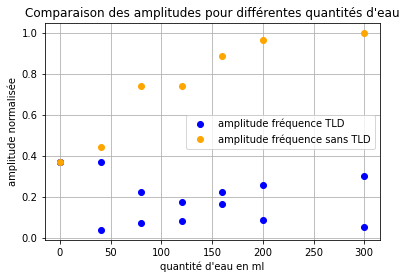

In [210]:
vol=np.array([0,40,80,120,160,200,300])
Aml=np.array([100,100,60,48,60,70,81])/270
Aml2=np.array([100,10,20,22,45,24,15])/270
Ag=np.array([100,120,200,200,240,260,270])/270
plt.plot(vol,Aml,'o',color='blue',label='amplitude fréquence TLD')
plt.plot(vol,Aml2,'o',color='blue')
plt.plot(vol,Ag,'o',color='orange',label='amplitude fréquence sans TLD')
plt.grid()
plt.legend()
plt.title("Comparaison des amplitudes pour différentes quantités d'eau")
plt.xlabel("quantité d'eau en ml")
plt.ylabel("amplitude normalisée")
plt.show()


Réduction de l'amplitude est maximale pour 160mL.

# Tracé de la Courbe des fréquences

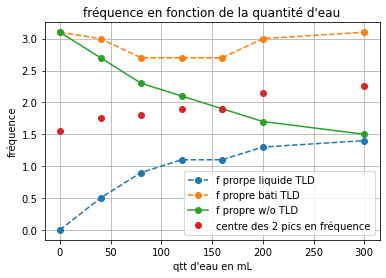

In [153]:
f=np.array([3.1,3,2.7,2.7,2.7,3,3.1])
f1=np.array([3.1,2.7,2.3,2.1,1.9,1.7,1.5])
f2=np.array([0,.5,.9,1.1,1.1,1.3,1.4])
vol=np.array([0,40,80,120,160,200,300])
plt.plot(vol,f2,'--o', label='f prorpe liquide TLD')
plt.plot(vol,f, '--o', label='f propre bati TLD')
plt.plot(vol,f1, '-o', label='f propre w/o TLD')
plt.plot(vol,(f+f2)/2,'o', label='centre des 2 pics en fréquence')

plt.xlabel("qtt d'eau en mL")
plt.ylabel('fréquence')
plt.title( "fréquence en fonction de la quantité d'eau")
plt.legend()
plt.grid()
plt.show()

On observe que la fréquence propre du bati sans amortisseur (pour 160g) coincide avec la moyenne des fréquences avec amortisseur (pour 160mL)

# Calculs théoriques

## Formule du ballotement théorique de l'eau (Abramson, 1966)

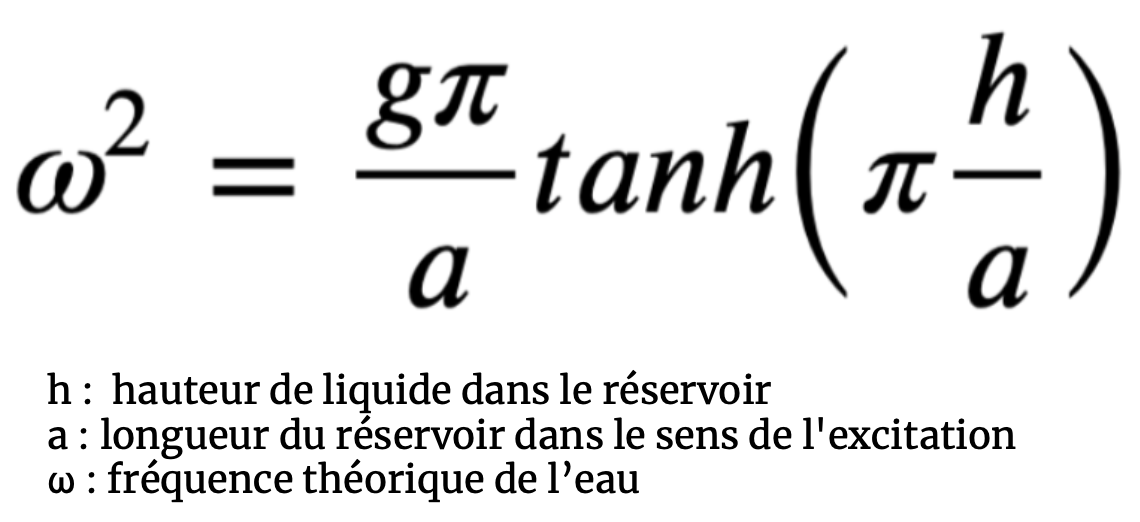

In [29]:
Image(filename='./figs/formule liquide.png',width=500)

## Calcul de la fréquence du bâti

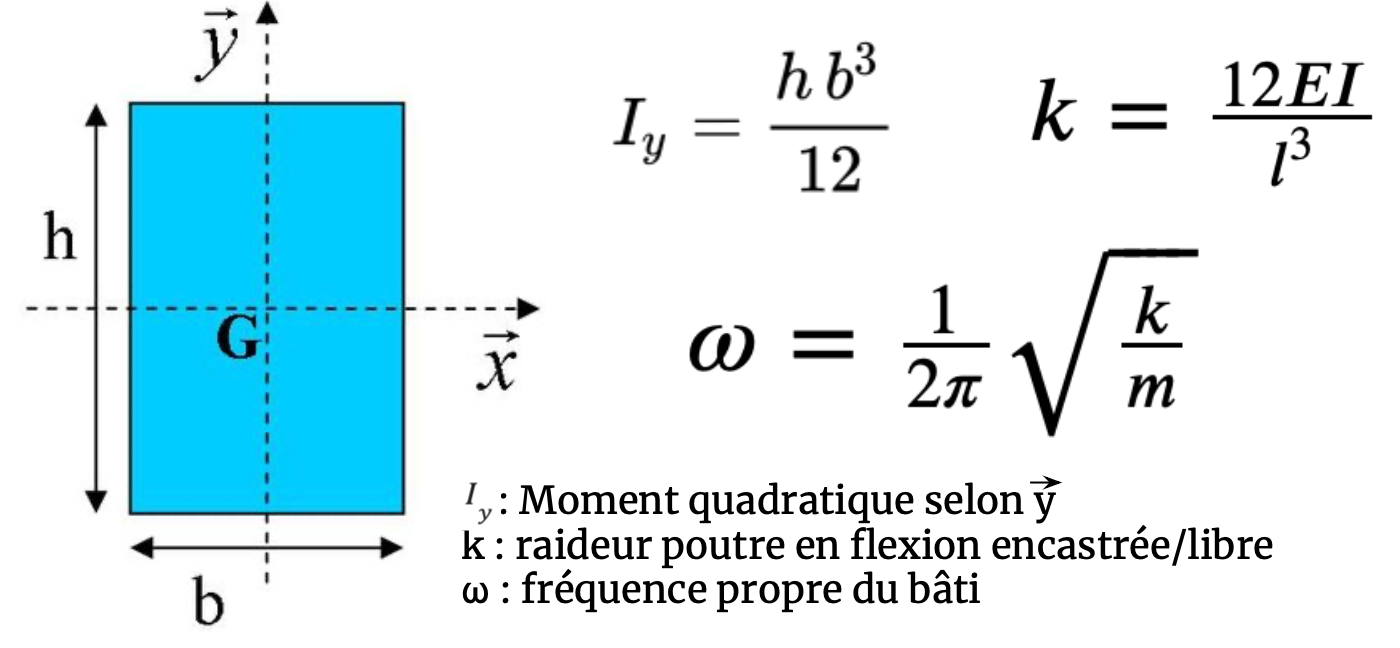

In [24]:
Image(filename='./figs/formule bati.png',width=700)

### valeurs théoriques des fréquences

In [140]:
E=1300*1000
g=9.8
a=.16
b=0.018
h=0.05
l=0.185
I=1/12*h*b**3
k =12*E*I/l**3

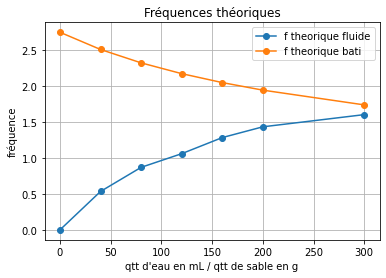

In [141]:
vol=np.array([0,40,80,120,160,200,300])
fl=np.zeros(len(vol))
fs=np.zeros(len(vol))
h1=np.array([0,.003,.008,.012,.018,.023,.03])
m=np.array([.2,.24,.28,.32,.36,.4,.5])

for i in range (0,len(vol)):
    fl[i]=1/2/np.pi*np.sqrt(g*np.pi/a*np.tanh(np.pi*h1[i]/a))
    fs[i]=np.sqrt(k/m[i])/2/np.pi   
    
plt.plot(vol,fl,'-o',label='f theorique fluide')
plt.plot(vol,fs,'-o',label='f theorique bati')
plt.xlabel("qtt d'eau en mL / qtt de sable en g")
plt.ylabel('fréquence')
plt.title( "Fréquences théoriques")
plt.legend()
plt.grid()
plt.show()    

# Comparaison des fréquences

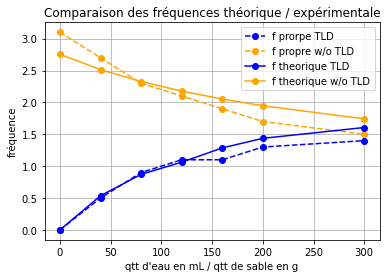

In [142]:
plt.plot(vol,f2,'--o', label='f prorpe TLD',color='blue')
plt.plot(vol,f1, '--o', label='f propre w/o TLD',color='orange')
plt.plot(vol,fl,'-o',label='f theorique TLD',color='blue')
plt.plot(vol,fs,'-o',label='f theorique w/o TLD',color='orange')
plt.xlabel("qtt d'eau en mL / qtt de sable en g")
plt.ylabel('fréquence')
plt.title( "Comparaison des fréquences théorique / expérimentale")
plt.legend()
plt.grid()
plt.show()   

On observe que le calcul des fréquences théoriques et le calcul des fréquences expérimentales valent presque la même chose : 
- fréquence ballotement : au plus 10% d'erreur
- fréquence bâti : au plus 16% d'erreur

# AMORTISSEMENT

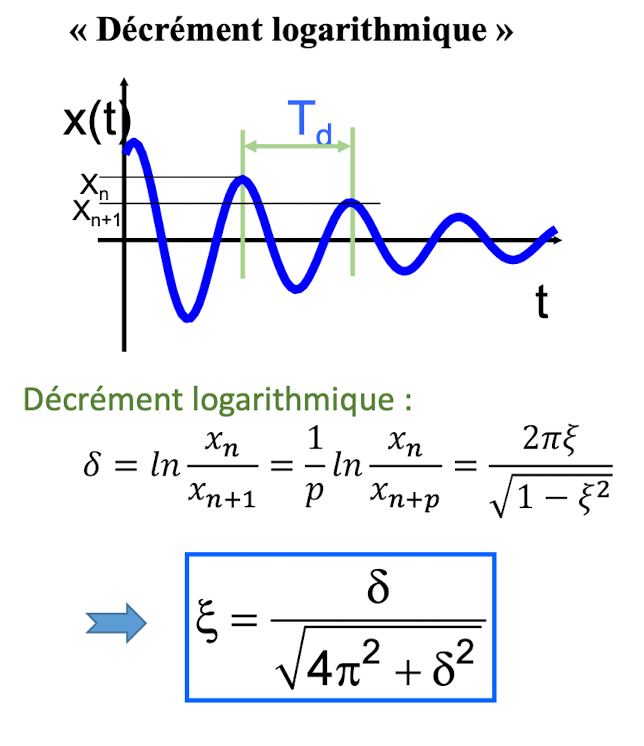

In [159]:
Image(filename='./figs/decrement log.png',width=500)

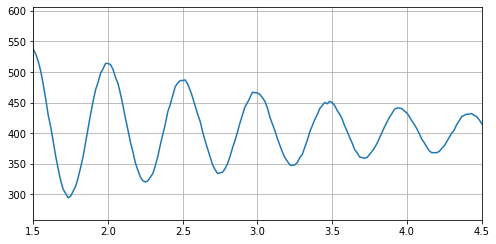

In [176]:
plt.plot(np.arange(0,len(X_120g))/60,X_120g, label='0mL')
#plt.plot(np.arange(0,len(X_120))/60,X_120+np.ones(len(X_120))*3, label='0mL')
plt.grid()
plt.xlim(1.5,4.5)
plt.show()

In [177]:
x0=515
x1=450
p=3


sig = np.log(x0/x1)/p
amo=sig/np.sqrt(4*np.pi**2+sig**2)
print('amortissement =',amo)

amortissement = 0.0071575087743691946


In [156]:
ksi_0 = 0.0041921248819131625
ksi_40 = 0.004686386621696938
ksi_80 = 0.009372464488295025
ksi_120 = 0.016476773818170247
ksi_160 = 0.01657216090580455
ksi_200 = 0.006971234515884568
ksi_300 = 0.0009364752326268236

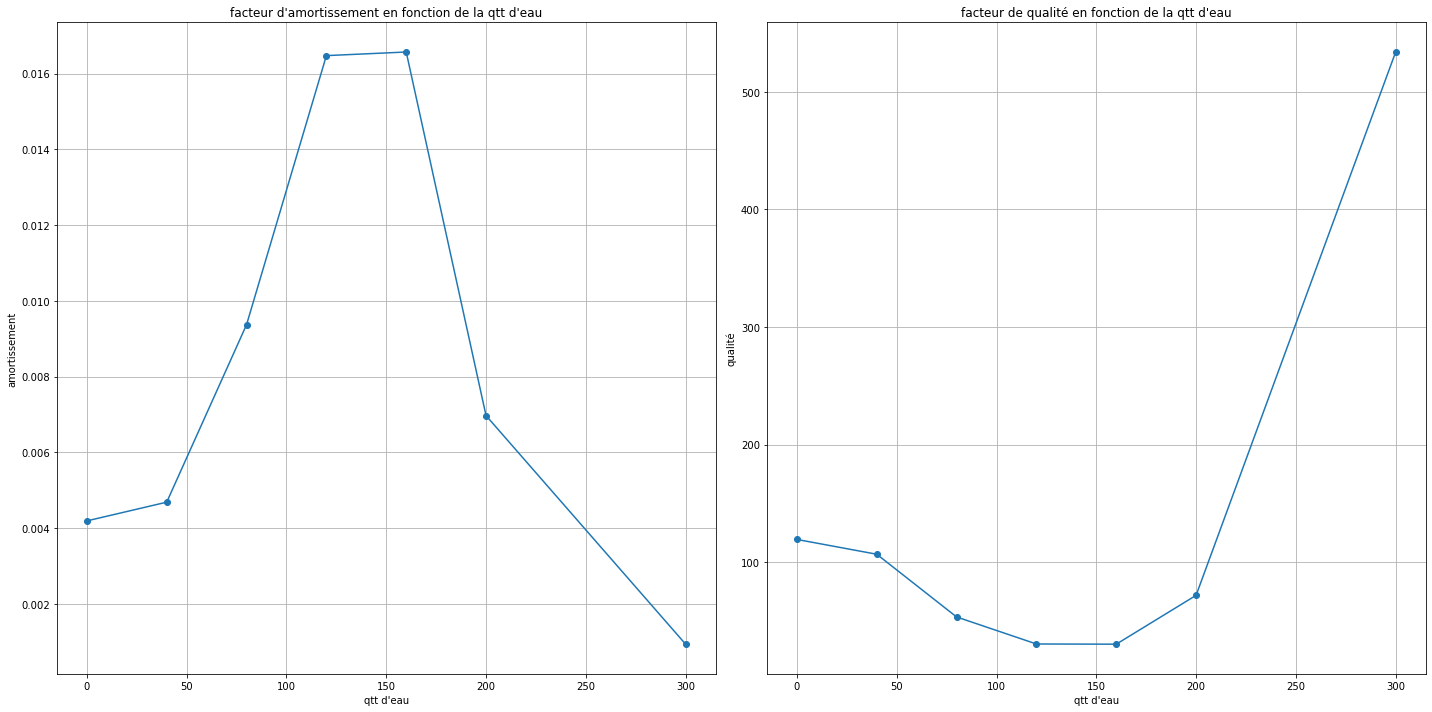

In [166]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))  

amo=[ksi_0,ksi_40,ksi_80,ksi_120,ksi_160,ksi_200,ksi_300]
vol=np.array([0,40,80,120,160,200,300])
Q= [.5/ksi_0,.5/ksi_40,.5/ksi_80,.5/ksi_120,.5/ksi_160,.5/ksi_200,.5/ksi_300]
plt.subplot(1,2,1)
plt.plot(vol,amo,'-o')
plt.grid()
plt.xlabel("qtt d'eau")
plt.ylabel("amortissement")
plt.title("facteur d'amortissement en fonction de la qtt d'eau")

plt.subplot(1,2,2)
plt.plot(vol,Q,'-o')
plt.grid()
plt.xlabel("qtt d'eau")
plt.ylabel("qualité")
plt.title("facteur de qualité en fonction de la qtt d'eau")
plt.show()

On voit bien que l'amortissement est maximale pour 160 mL ce qui confirme ce qu'on a dit précédemment. On quadruple l'amortissement par rapport au bati de base.

# Vibrations forcées


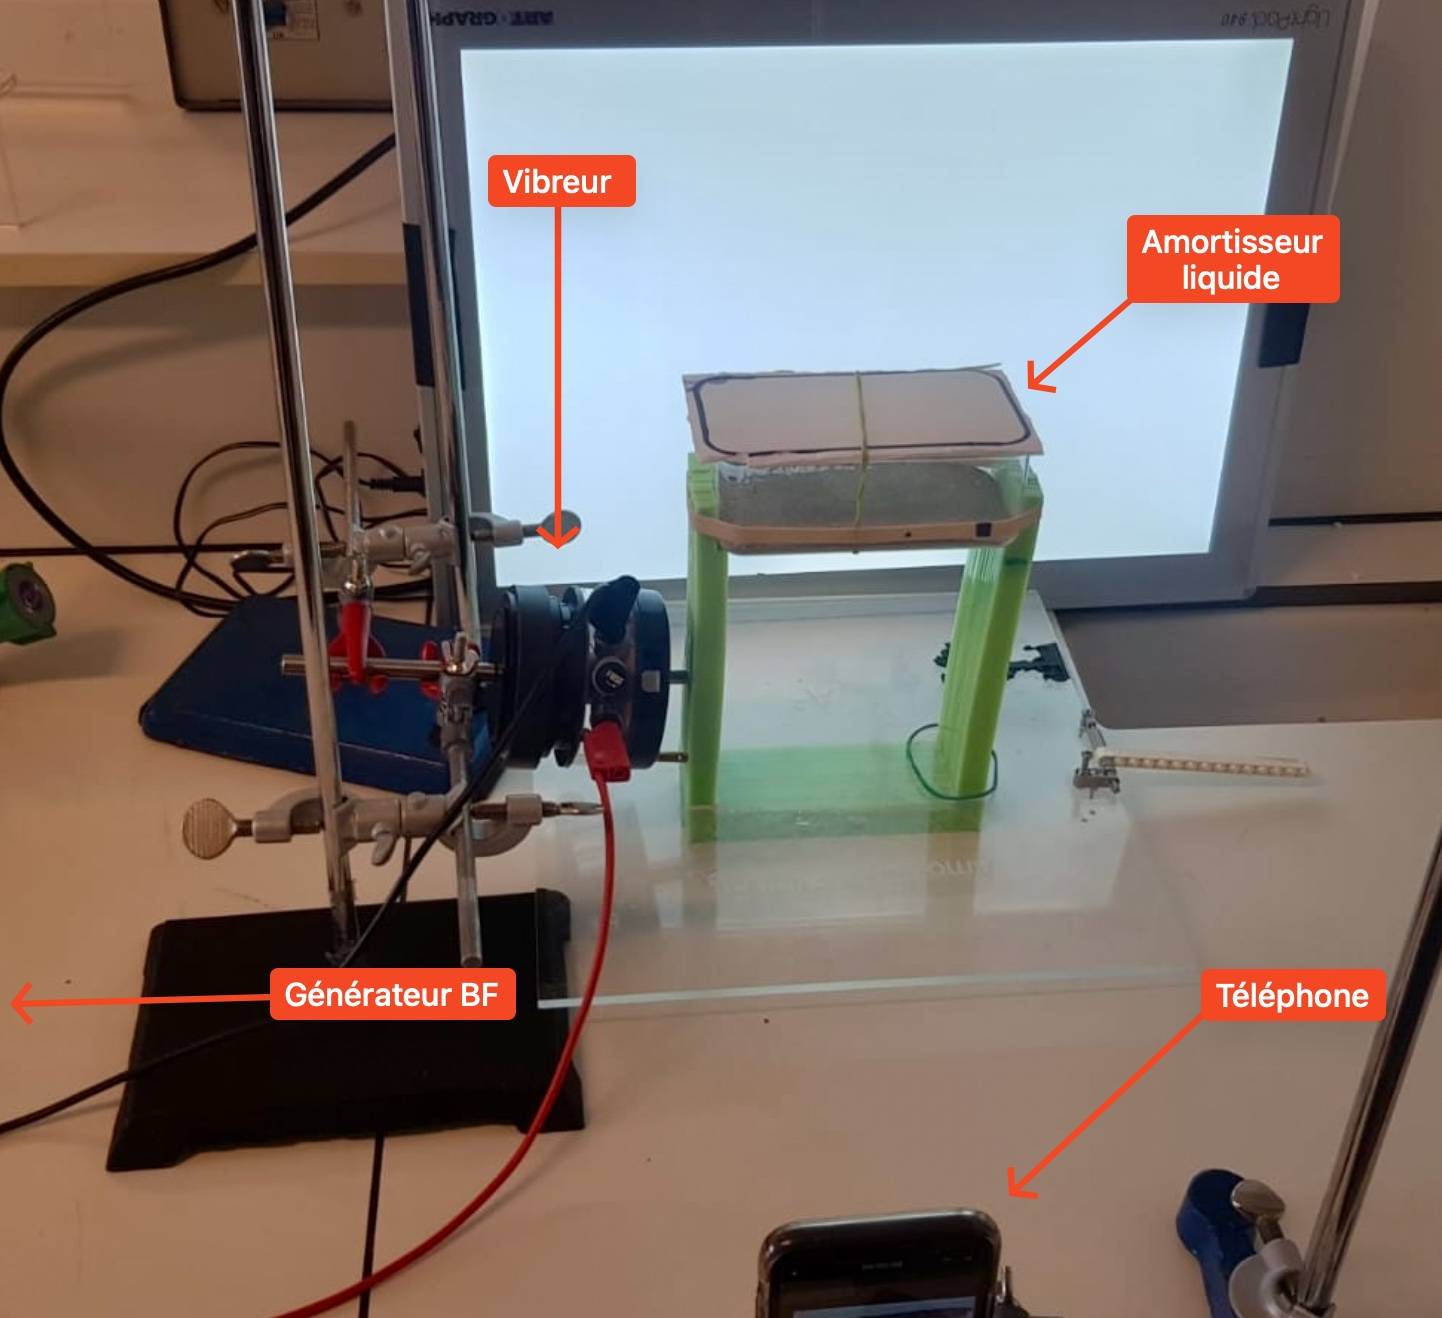

In [41]:
Image(filename='./figs/Experience.jpeg',width=700)

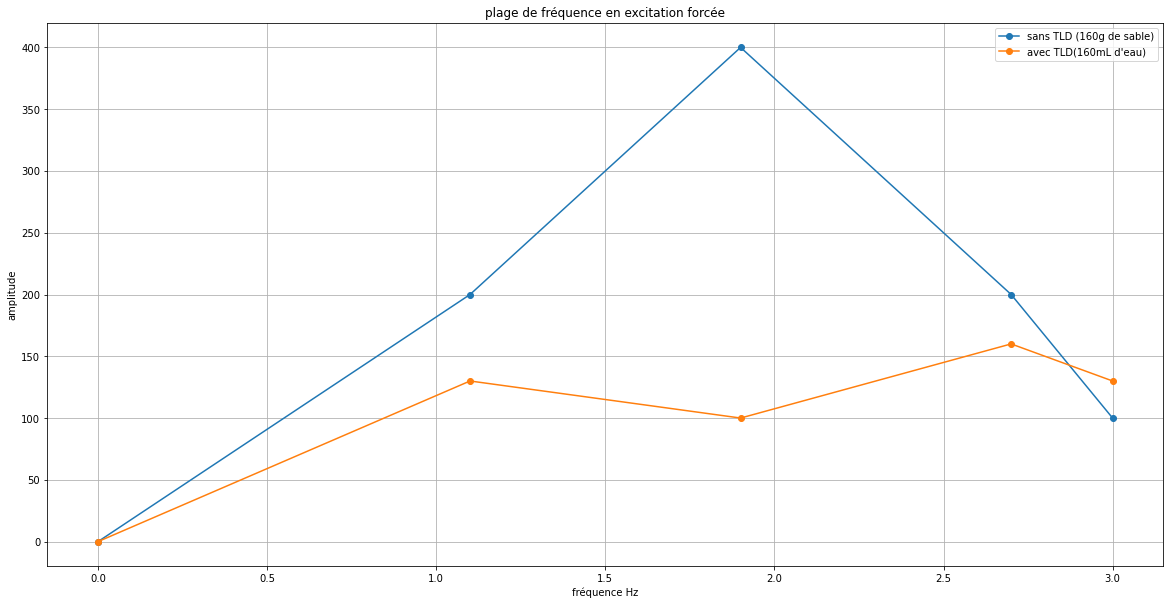

In [59]:
plt.figure(figsize=(20,10))
ampg=np.array([0,200,400,200,100])
ampfl=np.array([0,130,100,160,130])
f=np.array([0,1.1,1.9,2.7,3])
plt.plot(f,ampg,'-o',label='sans TLD (160g de sable)')
plt.plot(f,ampfl,'-o',label="avec TLD(160mL d'eau)")
plt.title('plage de fréquence en excitation forcée')
plt.xlabel('fréquence Hz')
plt.ylabel('amplitude')
plt.legend()
plt.grid()
plt.show()